<a href="https://colab.research.google.com/github/flinkflora17/ML_kurzus/blob/main/hazi4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from google.colab import drive
from google.colab import files
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input, Dense
import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras.metrics import MeanSquaredError
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Input, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from tensorflow.keras.utils import img_to_array

## Képek

In [11]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [12]:
class_names = ['repulo', 'auto', 'madar', 'macska', 'szarvas', 'kutya', 'beka', 'lo', 'hajo', 'kamion']

In [13]:
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

In [14]:
y_train=to_categorical(y_train, num_classes=len(class_names))
y_test=to_categorical(y_test, num_classes=len(class_names))

In [15]:
input = Input(shape=(32,32,3))

x=Conv2D(filters=64, kernel_size=5, strides=4, activation='relu', padding='same')(input)
x=MaxPooling2D(pool_size=(2,2), strides=2)(x)
x = Conv2D(filters=256, kernel_size=5, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2, strides=2)(x)
x = Conv2D(filters=384, kernel_size=3, activation='relu', padding='same')(x)
x = Conv2D(filters=384, kernel_size=3, activation='relu', padding='same')(x)
x = Conv2D(filters=192, kernel_size=3, activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=2, strides=2)(x)
x=Flatten()(x)

x=Dense(4096, activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(4096, activation='relu')(x)
x=Dropout(0.2)(x)

output=Dense(len(class_names), activation='softmax')(x)

In [16]:
AlexNet=keras.Model(input, output)
AlexNet.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping_callback = EarlyStopping(patience=5, restore_best_weights=True)

In [17]:
AlexNet.fit(x_train, y_train, epochs=100, validation_split=0.1, callbacks=[early_stopping_callback])

Epoch 1/100
1407/1407 [==============================] - 38s 26ms/step - loss: 2.3032 - accuracy: 0.1000 - val_loss: 2.3030 - val_accuracy: 0.0976
Epoch 2/100
1407/1407 [==============================] - 36s 26ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3028 - val_accuracy: 0.0976
Epoch 3/100
1407/1407 [==============================] - 35s 25ms/step - loss: 2.3028 - accuracy: 0.0966 - val_loss: 2.3028 - val_accuracy: 0.0958
Epoch 4/100
1407/1407 [==============================] - 37s 26ms/step - loss: 2.3028 - accuracy: 0.0965 - val_loss: 2.3029 - val_accuracy: 0.0970
Epoch 5/100
1407/1407 [==============================] - 35s 25ms/step - loss: 2.3028 - accuracy: 0.1000 - val_loss: 2.3028 - val_accuracy: 0.1024
Epoch 6/100
1407/1407 [==============================] - 35s 25ms/step - loss: 2.3028 - accuracy: 0.1004 - val_loss: 2.3031 - val_accuracy: 0.0958
Epoch 7/100
1407/1407 [==============================] - 35s 25ms/step - loss: 2.3028 - accuracy: 0.0968 - val_loss: 2

In [18]:
AlexNet.predict(x_test)

array([[0.10030571, 0.09800392, 0.10147741, ..., 0.0986959 , 0.09931897,
        0.10093428],
       [0.10030571, 0.09800392, 0.10147741, ..., 0.0986959 , 0.09931897,
        0.10093428],
       [0.10030571, 0.09800392, 0.10147741, ..., 0.0986959 , 0.09931897,
        0.10093428],
       ...,
       [0.10030571, 0.09800392, 0.10147741, ..., 0.0986959 , 0.09931897,
        0.10093428],
       [0.10030571, 0.09800392, 0.10147741, ..., 0.0986959 , 0.09931897,
        0.10093428],
       [0.10030571, 0.09800392, 0.10147741, ..., 0.0986959 , 0.09931897,
        0.10093428]], dtype=float32)

In [19]:
AlexNet.evaluate(x_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 2.3026 - accuracy: 0.1000


[2.3026442527770996, 0.10000000149011612]

Saját képek

In [20]:
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
kacsa = plt.imread('/content/drive/My Drive/MLkurzus/fileok/kacsa.jpg')
alpaka = plt.imread('/content/drive/My Drive/MLkurzus/fileok/alpaka.jpg')

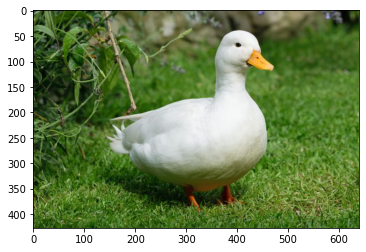

In [24]:
plt.imshow(kacsa)

In [50]:
kacsa1 = Image.open('/content/drive/My Drive/MLkurzus/fileok/kacsa.jpg')
alpaka1 = Image.open('/content/drive/My Drive/MLkurzus/fileok/alpaka.jpg')
tok1 = Image.open('/content/drive/My Drive/MLkurzus/fileok/kacsaforgatott.jpg')

In [51]:
kacsa11 = kacsa1.resize(size=(32, 32))
kacsa11 = img_to_array(kacsa11)

tok11 = tok1.resize(size=(32, 32))
tok11 = img_to_array(tok11)

alpaka1 = alpaka1.resize((32, 32))
alpaka1 = img_to_array(alpaka)

In [52]:
kacsa = kacsa11.astype('float32')/255
alpaka = alpaka1.astype('float32')/255
tok = tok11.astype('float32')/255

In [60]:
kepek = np.array([kacsa, alpaka, tok], dtype=object)

(3,)

In [58]:
AlexNet.predict(kepek)

ValueError: ignored

##Starbucks árfolyam

In [2]:
uploaded=files.upload()

Saving SBUX_daily.csv to SBUX_daily.csv


In [3]:
SBUX=pd.read_csv("SBUX_daily.csv")

In [4]:
SBUX.head

<bound method NDFrame.head of            Date        Open        High         Low       Close   Adj Close  \
0    2018-11-19   68.099998   68.470001   67.230003   67.910004   64.249252   
1    2018-11-20   67.389999   67.879997   66.760002   67.180000   63.558605   
2    2018-11-21   67.470001   67.980003   66.750000   66.769997   63.170696   
3    2018-11-23   66.239998   66.239998   65.260002   65.699997   62.158367   
4    2018-11-26   65.980003   66.120003   65.209999   65.690002   62.148907   
..          ...         ...         ...         ...         ...         ...   
750  2021-11-11  113.250000  113.250000  110.540001  111.440002  111.440002   
751  2021-11-12  111.739998  112.239998  111.089996  111.720001  111.720001   
752  2021-11-15  112.120003  113.650002  111.580002  111.870003  111.870003   
753  2021-11-16  112.279999  113.110001  111.510002  112.230003  112.230003   
754  2021-11-17  112.220001  113.110001  111.660004  112.519997  112.519997   

       Volume  
0    

In [5]:
sbux = SBUX['Adj Close']

In [6]:
sbux.head

<bound method NDFrame.head of 0       64.249252
1       63.558605
2       63.170696
3       62.158367
4       62.148907
          ...    
750    111.440002
751    111.720001
752    111.870003
753    112.230003
754    112.519997
Name: Adj Close, Length: 755, dtype: float64>

In [7]:
sbux = pd.DataFrame(sbux).to_numpy()

In [8]:
def split_sequence(sequence, n_steps):
	x, y = list(), list()
	for i in range(len(sequence)):
		end_ix = i + n_steps # Az adott szekvencia-darab utolsó eleme
		if end_ix > len(sequence)-1: # Ellenőrizzük nem értünk-e a teljes lista végére
			break
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix] # Kimentjük a szekvencia darabot és az utolsó elemet mint eredményváltozó
		x.append(seq_x)
		y.append(seq_y)
	return np.array(x), np.array(y)

In [10]:
x, y = split_sequence(sbux, 10)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, shuffle=True)

##Alexnet

In [13]:
input = Input(shape=(10,1))

x=Conv1D(filters=128, kernel_size=3, strides=1, activation='relu')(input)
x=MaxPooling1D(pool_size=2, strides=2)(x)
x=Conv1D(filters=128, kernel_size=3, strides=1, activation='relu')(x)
x =MaxPooling1D(pool_size=2, strides=2)(x)
x=Flatten()(x)

x=Dense(4096, activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(4096, activation='relu')(x)
x=Dropout(0.2)(x)

output = Dense(1, activation = 'linear')(x)

In [14]:
model = keras.Model(input, output)

In [15]:
model.compile(optimizer = 'adam', loss = 'MSE')

In [16]:
early_stopping_callback = EarlyStopping(patience=5, restore_best_weights=True)

In [18]:
model.fit(x_train, y_train, epochs = 150, validation_split = 0.1, callbacks = [early_stopping_callback])

Epoch 1/150
19/19 [==============================] - 4s 219ms/step - loss: 83.2739 - val_loss: 51.8752
Epoch 2/150
19/19 [==============================] - 4s 234ms/step - loss: 26.8990 - val_loss: 14.1689
Epoch 3/150
19/19 [==============================] - 4s 214ms/step - loss: 16.4599 - val_loss: 6.0737
Epoch 4/150
19/19 [==============================] - 4s 222ms/step - loss: 13.5961 - val_loss: 6.3471
Epoch 5/150
19/19 [==============================] - 4s 225ms/step - loss: 13.0603 - val_loss: 6.7471
Epoch 6/150
19/19 [==============================] - 4s 226ms/step - loss: 13.1957 - val_loss: 5.9922
Epoch 7/150
19/19 [==============================] - 6s 305ms/step - loss: 14.0219 - val_loss: 6.4723
Epoch 8/150
19/19 [==============================] - 4s 227ms/step - loss: 14.9044 - val_loss: 6.3218
Epoch 9/150
19/19 [==============================] - 4s 227ms/step - loss: 15.3187 - val_loss: 7.1632
Epoch 10/150
19/19 [==============================] - 4s 228ms/step - loss: 14.6

In [19]:
model.predict(x_test)

array([[103.72368 ],
       [ 86.7318  ],
       [ 67.46597 ],
       [ 63.147022],
       [105.07417 ],
       [ 84.665085],
       [ 85.06537 ],
       [ 63.28541 ],
       [ 61.728523],
       [ 84.82843 ],
       [100.97584 ],
       [ 74.757286],
       [ 84.33386 ],
       [ 73.35509 ],
       [112.47424 ],
       [ 86.39501 ],
       [ 73.904915],
       [ 84.626205],
       [115.983475],
       [ 79.013275],
       [111.62368 ],
       [ 74.06138 ],
       [ 79.00131 ],
       [ 83.22267 ],
       [ 87.622986],
       [100.81372 ],
       [ 80.81996 ],
       [ 64.60196 ],
       [112.16439 ],
       [ 62.40796 ],
       [ 80.59022 ],
       [ 79.40291 ],
       [ 73.31442 ],
       [ 87.522354],
       [ 76.645584],
       [ 61.18248 ],
       [113.18823 ],
       [ 66.87664 ],
       [ 72.6301  ],
       [ 96.57848 ],
       [ 84.94183 ],
       [ 66.970825],
       [ 87.80937 ],
       [119.34352 ],
       [ 82.95917 ],
       [ 77.564255],
       [ 64.23179 ],
       [ 75.4

In [20]:
model.evaluate(x_test, y_test)

3/3 [==============================] - 0s 39ms/step - loss: 7.9482


7.948219299316406